_________________________
[0.09821728693702184, 0.09821728693702184, 0.09821728693702184, 0.09821728693702184, 0.09821728693702184, 0.09821728693702184, 0.09821728693702184, 0.09821728693702184, 0.09821728693702184, 0.09821728693702184, 0.09821728693702184, 0.13197947932162468, 0.13197947932162468, 0.13197947932162468, 0.13197947932162468, 0.13197947932162468, 0.13197947932162468, 0.13197947932162468, 0.13197947932162468, 0.13197947932162468, 0.13197947932162468, 0.13197947932162468, 0.13197947932162468, 0.13197947932162468, 0.13197947932162468, 0.13197947932162468, 0.13197947932162468, 0.13197947932162468, 0.13197947932162468, 0.13197947932162468, 0.13197947932162468, 0.13197947932162468, 0.13197947932162468, 0.13197947932162468, 0.13197947932162468, 0.13197947932162468, 0.13197947932162468, 0.32841405319566835, 0.32841405319566835, 0.32841405319566835, 0.32841405319566835, 0.32841405319566835, 0.32841405319566835, 0.32841405319566835, 0.32841405319566835, 0.32841405319566835, 0.32841

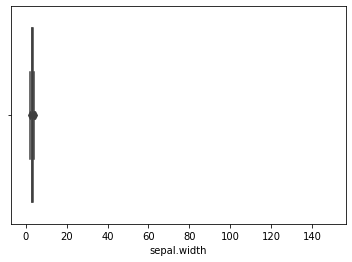

In [1]:


#%%



threshold = 3
point_outliers = np.where(z > threshold)
#%%
print("_________________________")
print(sorted(z))
print("-------------------------")
print(point_outliers, data_.iloc[15])

#%%

outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
            
    return outliers

outlier_datapoints = detect_outlier(data_)

#%%
print("_________________________")
print(sorted(data_))
print("-------------------------")
print(outlier_datapoints)

#%%

"""
A box-and-whisker plot uses quartiles (points that divide the data into four groups of equal size) to plot the shape of the data. The box represents the 1st and 3rd quartiles, which are equal to the 25th and 75th percentiles. The line inside the box represents the 2nd quartile, which is the median.

The interquartile range, which gives this method of outlier detection its name, is the range between the first and the third quartiles (the edges of the box). Tukey considered any data point that fell outside of either 1.5 times the IQR below the first – or 1.5 times the IQR above the third – quartile to be “outside” or “far out”. In a classic box-and-whisker plot, the ‘whiskers’ extend up to the last data point that is not “outside”.

"""
q1, q3= np.percentile(data_,[25,75])
iqr = q3 - q1

lower_bound = q1 - (1.5 * q1)
upper_bound = q3 + (1.5 * q3)


outliers = [x for x in list(data_) if x < lower_bound or x > upper_bound]

print("q1, q3: ", q1, q3)
print("lower_bound, upper_bound: ", lower_bound, upper_bound)
print("outliers: ", outliers)
##################################
lower_bound = q1 - (0.25 * q1)
upper_bound = q3 + (0.25 * q3)

outliers = [x for x in list(data_) if x < lower_bound or x > upper_bound]

print("q1, q3: ", q1, q3)
print("lower_bound, upper_bound: ", lower_bound, upper_bound)
print("outliers: ", outliers)

#%%





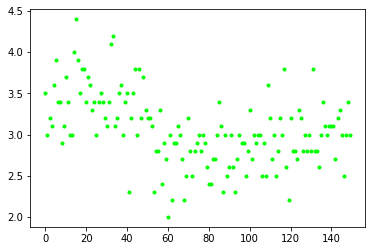

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Tue Dec 24 12:24:38 2019

@author: ugur.ceylan
"""


# -*- coding: utf-8 -*-
"""
Spyder Editor

This is a temporary script file.
"""
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
data = pd.read_csv("datasets/iris.csv")
data.drop(columns=["variety"], axis=1, inplace=True)

#%%
columns = data.columns
data_ = data[columns[1]] 

#%%

y = data_   
x = list(range(0, len(y)))
plt.plot(x, y, '.', color='lime')


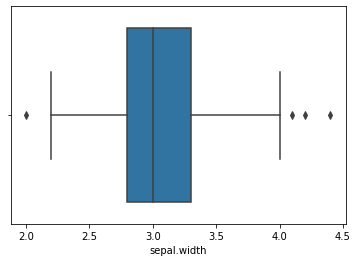

In [3]:
import numpy as np
sns.boxplot(x=data_)

#%%

# We will use Z-score function defined in scipy library to detect the outliers
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data_))